# Lab 4 - Decision Tree
The model that will be analyzed this time is Decision Trees
There are some parameters that influentiate the model, therefore the tests involve changing these parameters. The values will be:

* The minimum number of samples required to be at a leaf node (in percentage): [.05, .025, .01, .0075, .005, .0025, .001]
* The maximum depth of the tree: [5, 10, 25, 50]
* The function to measure the quality of a split: ['entropy', 'gini']

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn.metrics as metrics
import itertools
import modelAnalyzesFunctions as analyzes

In [2]:
data_7: pd.DataFrame = pd.read_csv('datasets/pd_data_preparation_7.csv', sep=',', decimal='.', index_col='id')
y_7: np.ndarray = data_7.pop('class').values
X_7: np.ndarray = data_7.values
labels_7 = pd.unique(y_7)

data_8: pd.DataFrame = pd.read_csv('datasets/pd_data_preparation.csv', sep=',', decimal='.', index_col='id')
y_8: np.ndarray = data_8.pop('class').values
X_8: np.ndarray = data_8.values
labels_8 = pd.unique(y_8)

data_9: pd.DataFrame = pd.read_csv('datasets/pd_data_preparation_9.csv', sep=',', decimal='.', index_col='id')
y_9: np.ndarray = data_9.pop('class').values
X_9: np.ndarray = data_9.values
labels_9 = pd.unique(y_9)

data_8.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,minIntensity,...,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_30
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.916232,0.475707,0.590235,0.284974,0.022323,0.075900,0.271284,0.944323,0.692855,...,0.075621,0.300582,0.105270,0.013066,0.004055,0.003293,0.000374,0.000178,0.000191,0.098628
1,0.0,0.182314,0.806469,0.630075,0.242228,0.689703,0.247423,0.228818,0.876238,0.882924,...,0.072430,0.077755,0.174381,0.038398,0.008310,0.001114,0.001689,0.024783,0.018258,0.040204
2,1.0,0.877689,0.216841,0.516437,0.448187,0.033848,0.087255,0.117413,0.974092,0.871010,...,0.147429,0.038159,0.013139,0.007834,0.019385,0.000201,0.000368,0.000336,0.213153,0.120303
3,0.0,0.925807,0.237611,0.542708,0.785622,0.010547,0.021814,0.161006,0.983185,0.781731,...,0.016141,0.161223,0.097629,0.037870,0.020783,0.009404,0.018881,0.003916,0.000815,0.009216
4,0.0,0.930451,0.757013,0.842307,0.532383,0.754983,0.148962,0.722861,0.734980,0.497109,...,0.142211,0.230036,0.117364,0.022389,0.009184,0.006695,0.009538,0.010617,0.013877,0.010267


<Figure size 432x288 with 0 Axes>

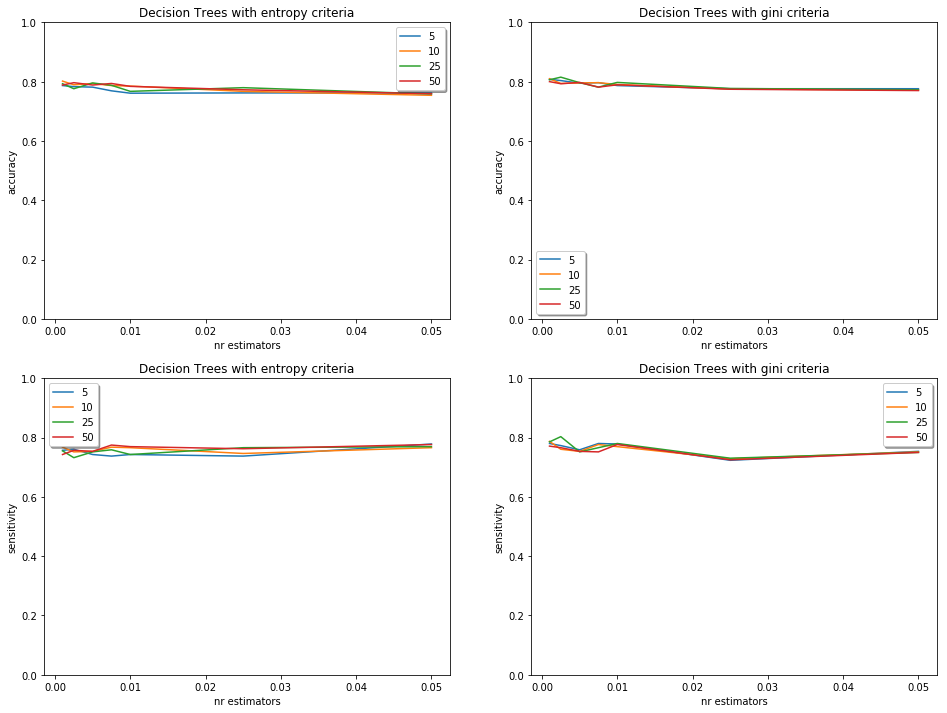

In [3]:
n_splits = 4
n_repeats = 3

rskf = RepeatedStratifiedKFold(n_splits, n_repeats, random_state=42)

min_samples_leaf = [.05, .025, .01, .0075, .005, .0025, .001]
max_depths = [5, 10, 25, 50]
criteria = ['entropy', 'gini']

accuracy, sensitivity, decision_trees = analyzes.decision_tree_analyzes(X_8, y_8, min_samples_leaf, max_depths, criteria, rskf)

In [4]:
for c in criteria:
    max_acc, max_sens = analyzes.get_max_accuracy_sensitivity_data(accuracy, sensitivity, max_depths, min_samples_leaf, c)
    
    print()
    print(c, '- max accuracy:')
    print('Accuracy:', max_acc['acc'])
    print('Sensitivity:', max_acc['sens'])
    print('max_depth:', max_acc['max_depth'])
    print('min_samples_leaf:', max_acc['min_sample_leaf'])
    print()
    print(c, '- max sensitivity:')
    print('Accuracy:', max_sens['acc'])
    print('Sensitivity:', max_sens['sens'])
    print('max_depth:', max_sens['max_depth'])
    print('min_samples_leaf:', max_sens['min_sample_leaf'])



entropy - max accuracy:
Accuracy: 0.8023049645390071
Sensitivity: 0.7677304964539008
max_depth: 10
min_samples_leaf: 0.001

entropy - max sensitivity:
Accuracy: 0.7624113475177304
Sensitivity: 0.7783687943262412
max_depth: 5
min_samples_leaf: 0.05

gini - max accuracy:
Accuracy: 0.8156028368794326
Sensitivity: 0.8031914893617021
max_depth: 25
min_samples_leaf: 0.0025

gini - max sensitivity:
Accuracy: 0.8156028368794326
Sensitivity: 0.8031914893617021
max_depth: 25
min_samples_leaf: 0.0025


For the datasets without features with 0.7 and 0.9 correlation

<Figure size 432x288 with 0 Axes>

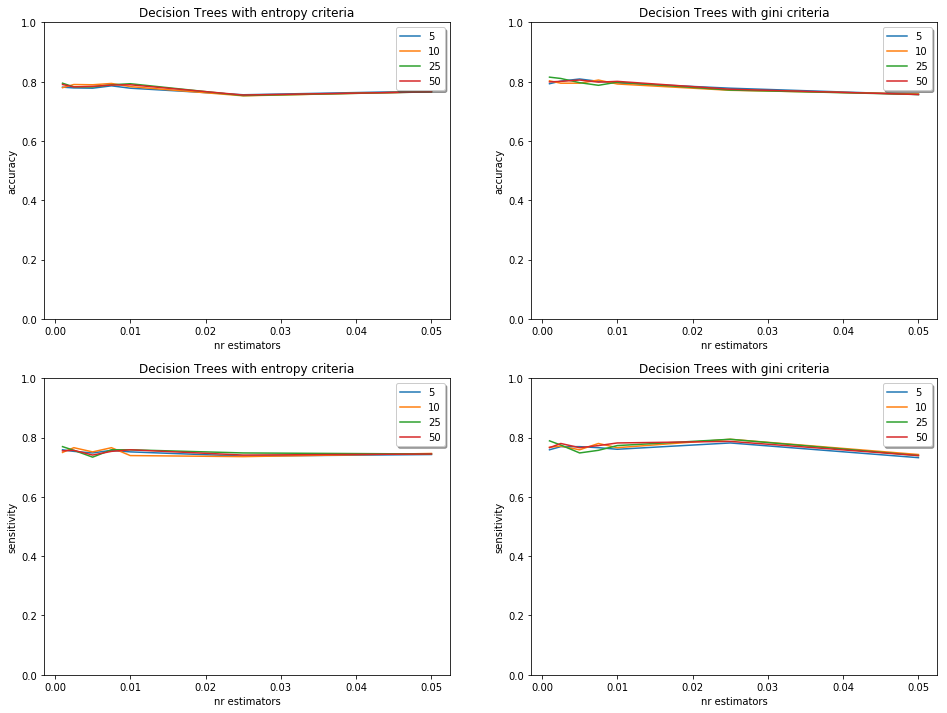

In [5]:
accuracy_7, sensitivity_7, decision_trees_7 = analyzes.decision_tree_analyzes(X_7, y_7, min_samples_leaf, max_depths, criteria, rskf)

In [6]:
for c in criteria:
    max_acc, max_sens = analyzes.get_max_accuracy_sensitivity_data(accuracy_7, sensitivity_7, max_depths, min_samples_leaf, c)
    
    print()
    print(c, '- max accuracy:')
    print('Accuracy:', max_acc['acc'])
    print('Sensitivity:', max_acc['sens'])
    print('max_depth:', max_acc['max_depth'])
    print('min_samples_leaf:', max_acc['min_sample_leaf'])
    print()
    print(c, '- max sensitivity:')
    print('Accuracy:', max_sens['acc'])
    print('Sensitivity:', max_sens['sens'])
    print('max_depth:', max_sens['max_depth'])
    print('min_samples_leaf:', max_sens['min_sample_leaf'])



entropy - max accuracy:
Accuracy: 0.7952127659574467
Sensitivity: 0.7695035460992908
max_depth: 25
min_samples_leaf: 0.001

entropy - max sensitivity:
Accuracy: 0.7952127659574467
Sensitivity: 0.7695035460992908
max_depth: 25
min_samples_leaf: 0.001

gini - max accuracy:
Accuracy: 0.8156028368794326
Sensitivity: 0.7890070921985815
max_depth: 25
min_samples_leaf: 0.001

gini - max sensitivity:
Accuracy: 0.7712765957446809
Sensitivity: 0.7943262411347519
max_depth: 10
min_samples_leaf: 0.025


<Figure size 432x288 with 0 Axes>

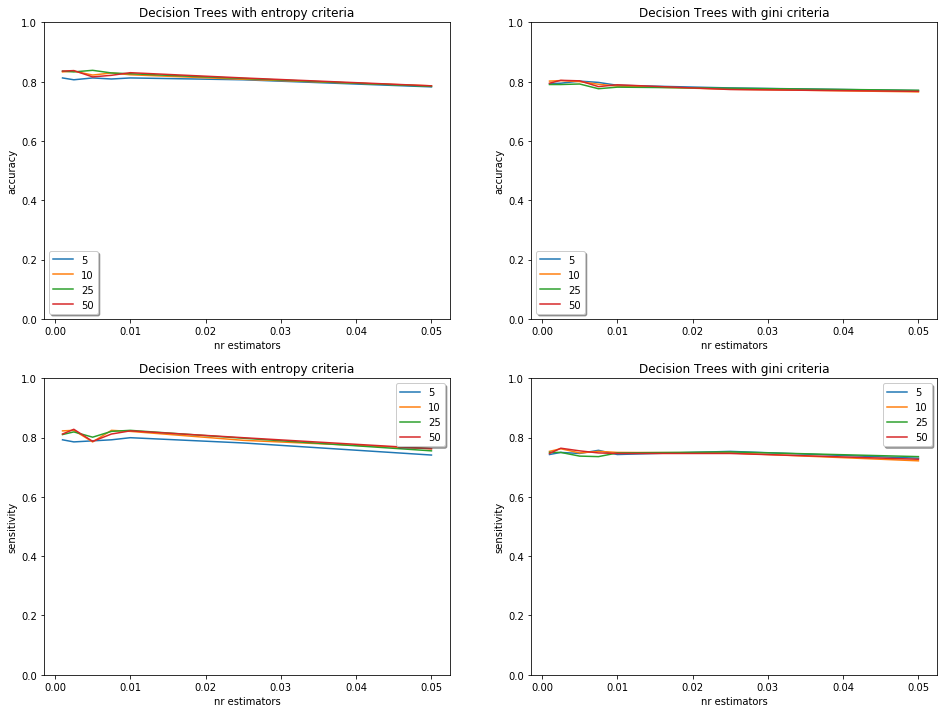

In [7]:
accuracy_9, sensitivity_9, decision_trees_9 = analyzes.decision_tree_analyzes(X_9, y_9, min_samples_leaf, max_depths, criteria, rskf)

In [8]:
for c in criteria:
    max_acc, max_sens = analyzes.get_max_accuracy_sensitivity_data(accuracy_9, sensitivity_9, max_depths, min_samples_leaf, c)
    
    print()
    print(c, '- max accuracy:')
    print('Accuracy:', max_acc['acc'])
    print('Sensitivity:', max_acc['sens'])
    print('max_depth:', max_acc['max_depth'])
    print('min_samples_leaf:', max_acc['min_sample_leaf'])
    print()
    print(c, '- max sensitivity:')
    print('Accuracy:', max_sens['acc'])
    print('Sensitivity:', max_sens['sens'])
    print('max_depth:', max_sens['max_depth'])
    print('min_samples_leaf:', max_sens['min_sample_leaf'])



entropy - max accuracy:
Accuracy: 0.8386524822695035
Sensitivity: 0.8014184397163121
max_depth: 25
min_samples_leaf: 0.005

entropy - max sensitivity:
Accuracy: 0.8377659574468085
Sensitivity: 0.828014184397163
max_depth: 50
min_samples_leaf: 0.0025

gini - max accuracy:
Accuracy: 0.8049645390070922
Sensitivity: 0.7641843971631204
max_depth: 50
min_samples_leaf: 0.0025

gini - max sensitivity:
Accuracy: 0.8049645390070922
Sensitivity: 0.7641843971631204
max_depth: 50
min_samples_leaf: 0.0025


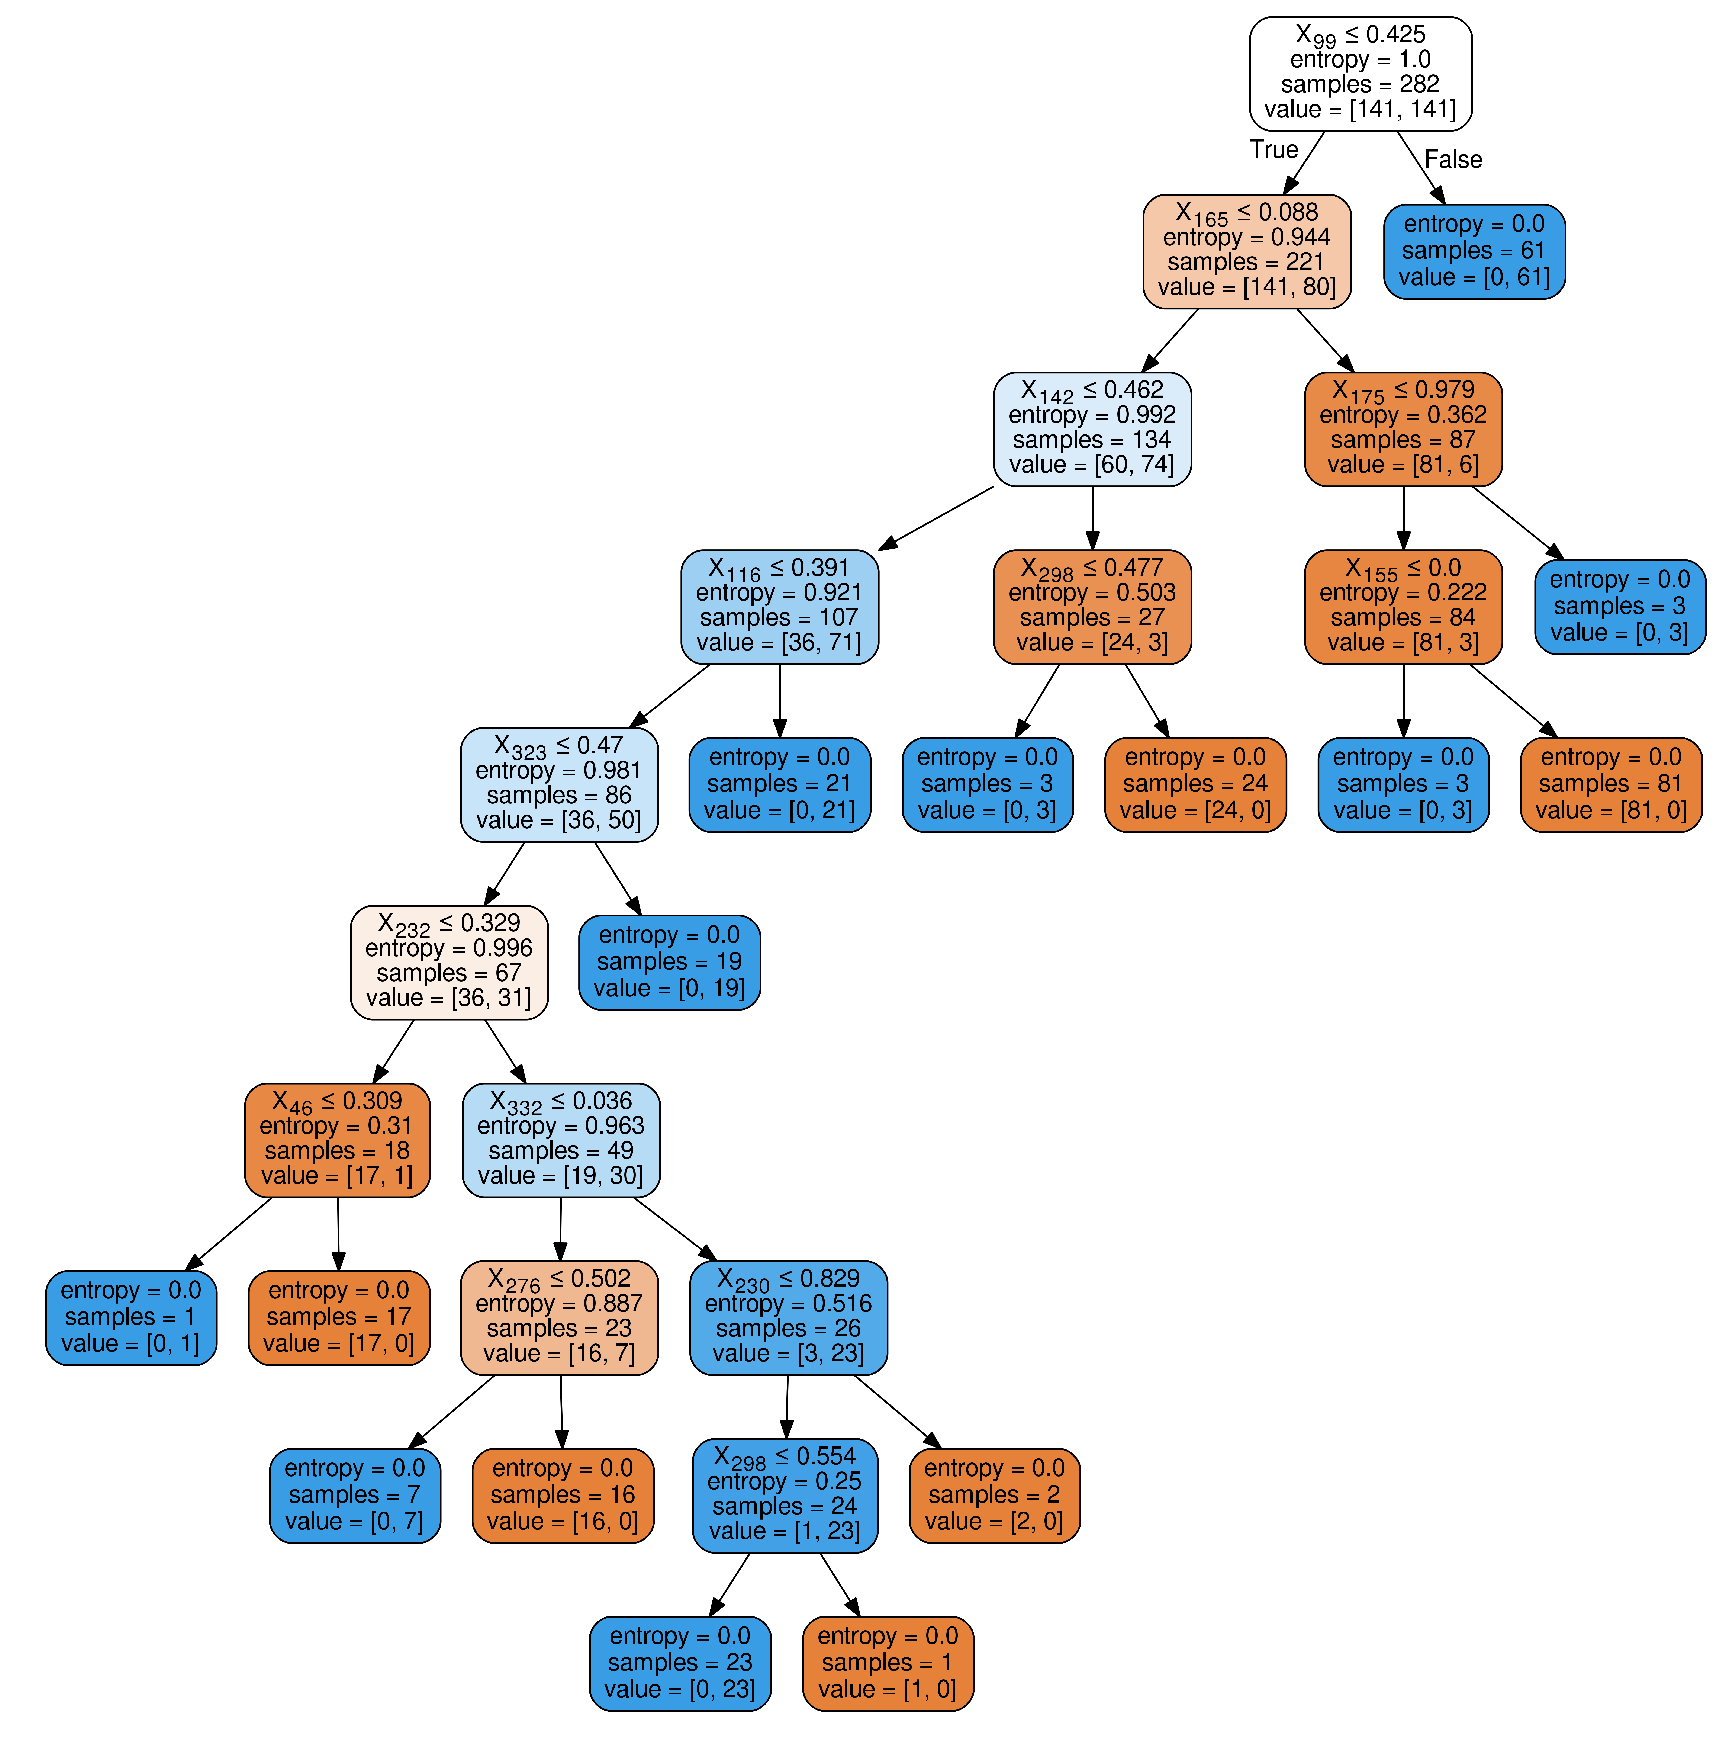

In [14]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(decision_trees_9['entropy'][25], out_file='dtree.dot', filled=True, rounded=True, special_characters=True)  
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])

plt.figure(figsize = (30, 40))
plt.imshow(plt.imread('dtree.png'))
plt.axis('off')
plt.show()